In [1]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
df = pd.read_csv('data/raw/Walmart_data.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Extracting datetime features
from src import features

features.featExtract(df)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [5]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,15.678322
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,31.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,8.755780


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Day           6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

# Weekly sales

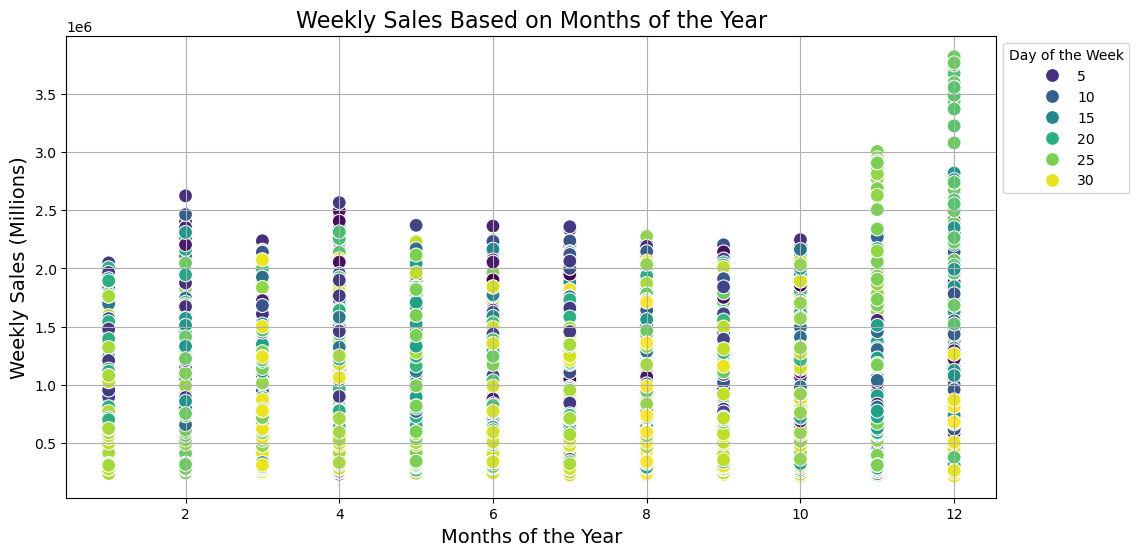

In [8]:
# Weekly Sales Based on Months of the Year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Month', y='Weekly_Sales', data=df, hue='Day', palette='viridis', s=100)

plt.title('Weekly Sales Based on Months of the Year', fontsize=16)
plt.xlabel('Months of the Year', fontsize=14)
plt.ylabel('Weekly Sales (Millions)', fontsize=14)
plt.legend(title='Day of the Week', bbox_to_anchor=(1,1), loc='upper left')
plt.grid(True)
plt.show()

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_40939/3471600899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=weekly_sales_per_store, palette='viridis')


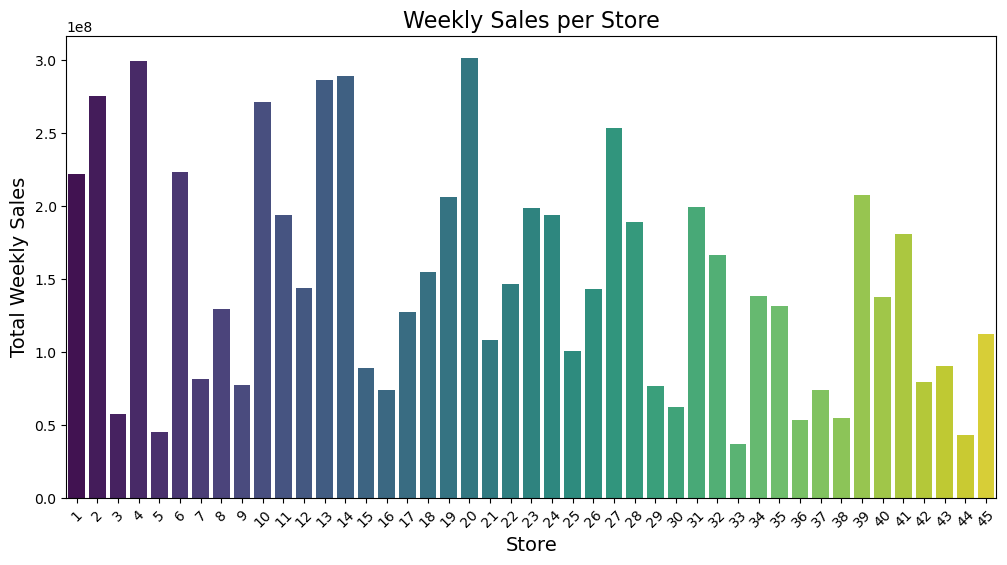

In [9]:
# Weekly sales per store
weekly_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=weekly_sales_per_store, palette='viridis')

plt.title('Weekly Sales per Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_40939/4106115062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Store', y='Weekly_Sales', data=df, palette='viridis')


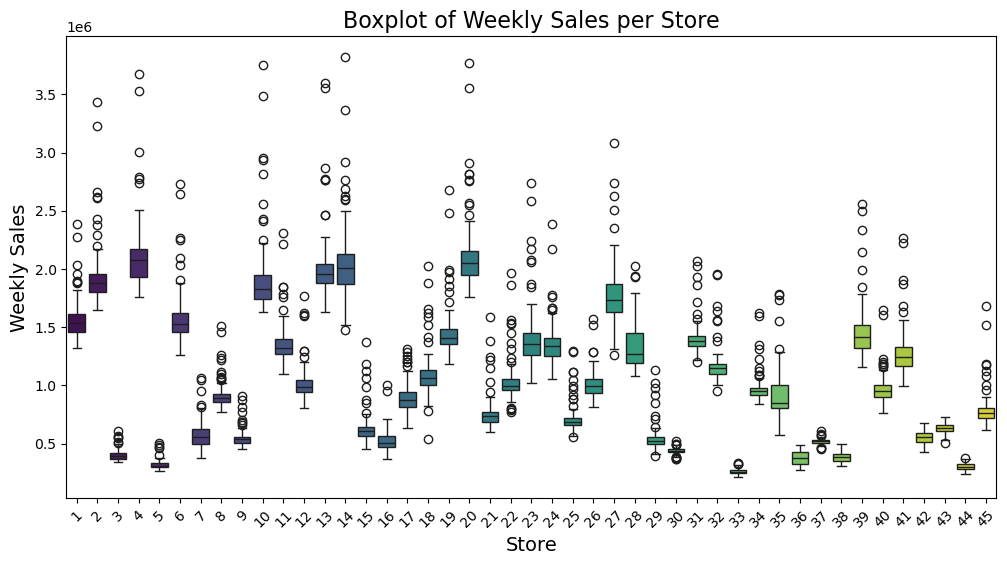

In [10]:
# Boxplot - Weekly_Sales per Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df, palette='viridis')

plt.title('Boxplot of Weekly Sales per Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.show()

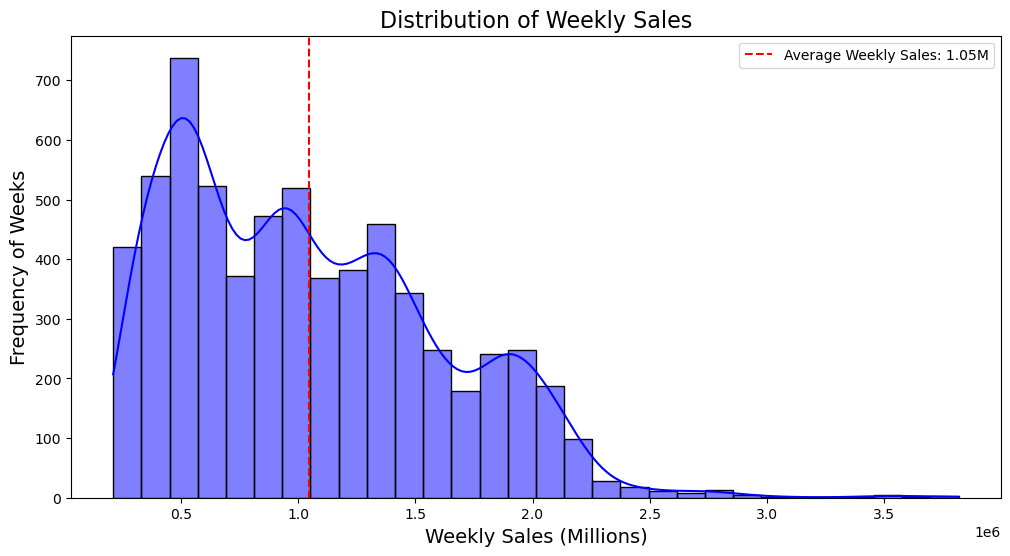

In [11]:
# Weekly sales - Cummulative of all stores
average_sales = df['Weekly_Sales'].mean()   # The average weekly sales

plt.figure(figsize=(12, 6))
sns.histplot(df.Weekly_Sales, bins=30, kde=True, color='blue')

plt.title('Distribution of Weekly Sales', fontsize=16)
plt.axvline(average_sales, color='red', linestyle='--', label='Average Weekly Sales: {:.2f}M'.format(average_sales / 1e6))
plt.xlabel('Weekly Sales (Millions)', fontsize=14)
plt.ylabel('Frequency of Weeks', fontsize=14)
plt.legend(loc='upper right')
plt.show()

Based on the plot above, the average store sales are approximately $1.1 million, with individual figures ranging between $0.25 million and $2.2 million.

# Factors affecting Weekly sales

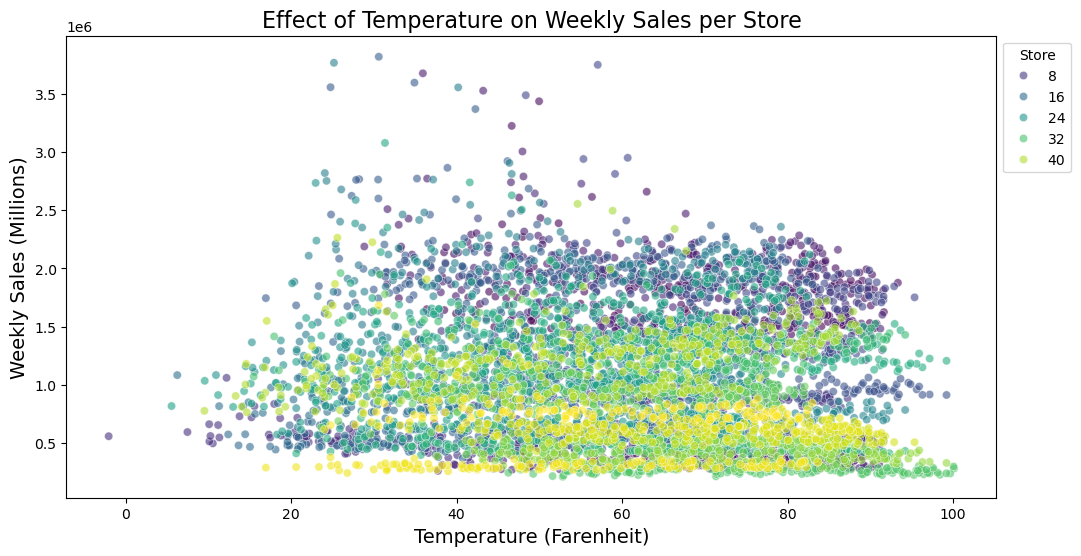

In [12]:
# Effect of Temperature on Weekly Sales per Store
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Temperature on Weekly Sales per Store', fontsize=16)
plt.xlabel('Temperature (Farenheit)', fontsize=14)
plt.ylabel('Weekly Sales (Millions)', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

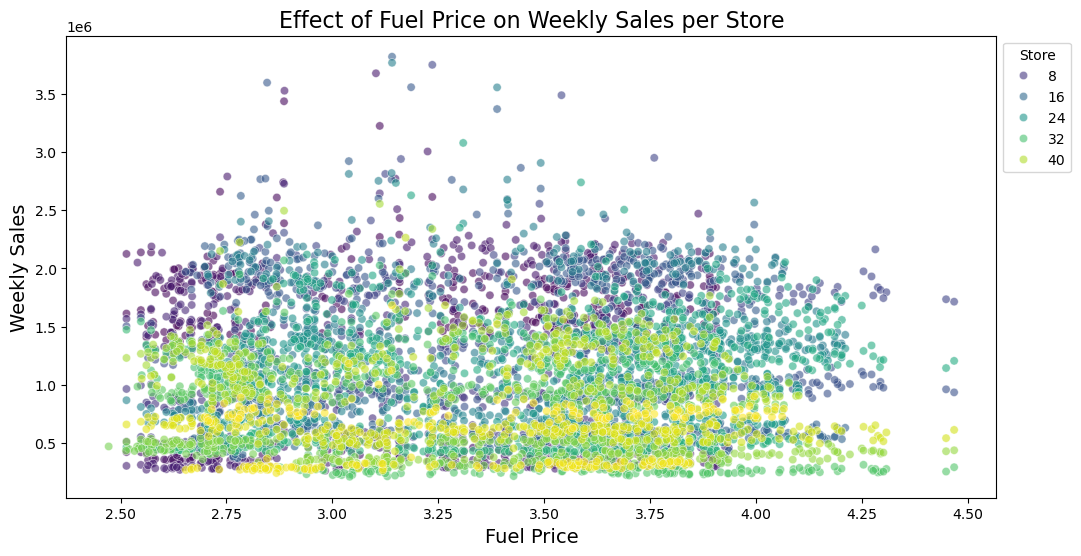

In [13]:
# Effect of Fuel price on Weekly Sales per Store
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Fuel Price on Weekly Sales per Store', fontsize=16)
plt.xlabel('Fuel Price', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

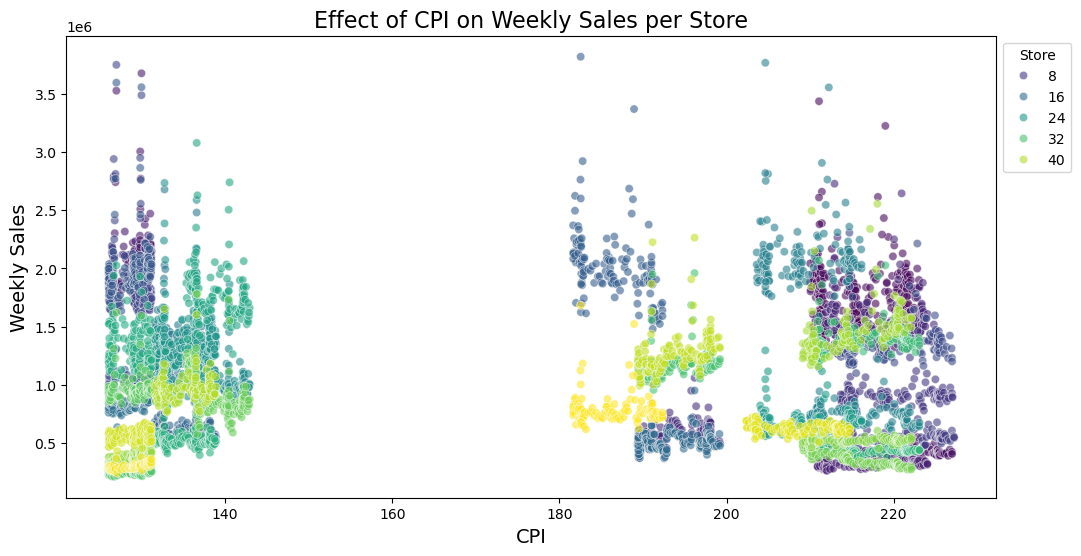

In [14]:
# Effect of CPI on Weekly Sales per Store
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of CPI on Weekly Sales per Store', fontsize=16)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()

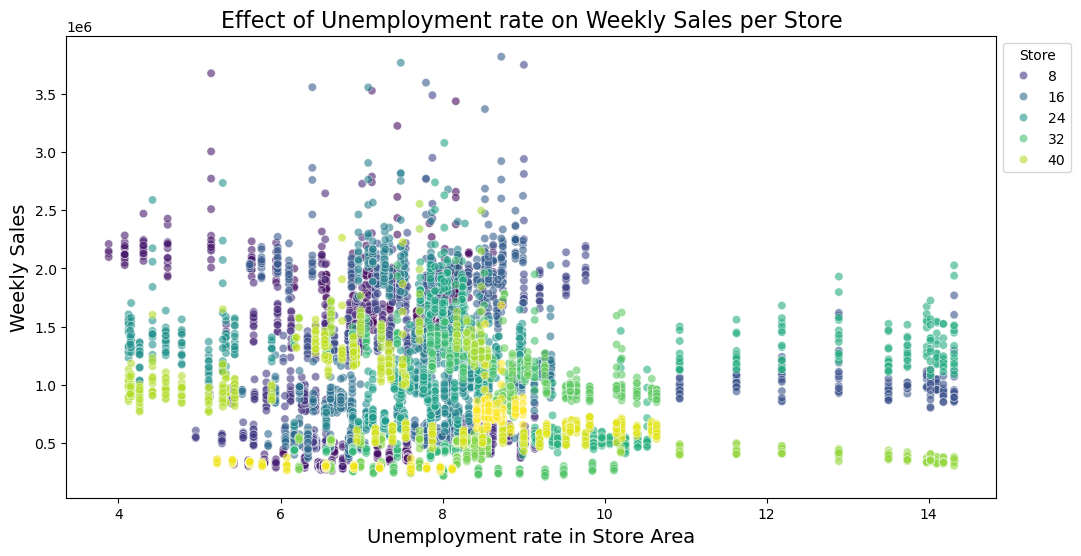

In [15]:
# Effect of Unemployment on Weekly Sales per Store
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Store', palette='viridis', alpha=0.6)

plt.title('Effect of Unemployment rate on Weekly Sales per Store', fontsize=16)
plt.xlabel('Unemployment rate in Store Area', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.legend(title='Store', bbox_to_anchor=(1,1), loc='upper left')
plt.show()